<a href="https://colab.research.google.com/github/andysingal/deep-learning/blob/main/NN_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><b>Dense Layer </b>- A perceptron is composed of one or more TLUs organized in a single layer, where every TLU is connected to every input. Such a layer is called a fully connected layer, or a dense layer.
</p>

<p><b>Output layer</b> - layer of TLUs produces the final outputs, it is called the output layer.
</p>

<p>** This perceptron can classify instances simultaneously into three different binary classes, which makes it a multilabel classifier. It may also be used for multiclass classification.</p>

<p>Perceptrons are trained using a variant of this rule that takes into account the error made by the network when it makes a prediction; the perceptron learning rule reinforces connections that help reduce the error. </p>

<p>
The decision boundary of each output neuron is linear, so perceptrons are incapable of learning complex patterns (just like logistic regression classifiers). However, if the training instances are linearly separable, Rosenblatt demonstrated that this algorithm would converge to a solution.⁠7 This is called the perceptron convergence theorem.

</p>

<p><b>multilayer perceptron:<b> It turns out that some of the limitations of perceptrons can be eliminated by stacking multiple perceptrons. The resulting ANN is called a multilayer perceptron (MLP) </p>


<br>
<br>
<br>

<p><b>Disadvantages</b>: Contrary to logistic regression classifiers, perceptrons do not output a class probability. This is one reason to prefer logistic regression over perceptrons. Moreover, perceptrons do not use any regularization by default, and training stops as soon as there are no more prediction errors on the training set, so the model typically does not generalize as well as logistic regression or a linear SVM classifier. However, perceptrons may train a bit faster.</p>

**#The Multilayer Perceptron and Backpropagation**

- An MLP is composed of one input layer, one or more layers of TLUs called hidden layers, and one final layer of TLUs called the output layer

- The field of deep learning studies DNNs, and more generally it is interested in models containing deep stacks of computations. Even so, many people talk about deep learning whenever neural networks are involved


- <b>This algorithm is now called reverse-mode automatic differentiation (or reverse-mode autodiff for short). In just two passes through the network (one forward, one backward), it is able to compute the gradients of the neural network’s error with regard to every single model parameter. In other words, it can find out how each connection weight and each bias should be tweaked in order to reduce the neural network’s error.</b>

- In just two passes through the network (one forward, one backward), it is able to compute the gradients of the neural network’s error with regard to every single model parameter. In other words, it can find out how each connection weight and each bias should be tweaked in order to reduce the neural network’s error. 

- **reverse-mode autodiff - compute all the gradients automatically and efficiently. This algorithm is now called reverse-mode automatic differentiation (or reverse-mode autodiff for short).**


# Backpropagation
**This combination of reverse-mode autodiff and gradient descent is now called backpropagation (or backprop for short).**

Let’s run through how backpropagation works again in a bit more detail:

It handles one mini-batch at a time (for example, containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an epoch.

- Each mini-batch enters the network through the input layer. The algorithm then computes the output of all the neurons in the first hidden layer, for every instance in the mini-batch. The result is passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the output layer. This is the forward pass: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.

- Next, the algorithm measures the network’s output error (i.e., it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).

- Then it computes how much each output bias and each connection to the output layer contributed to the error. This is done analytically by applying the chain rule (perhaps the most fundamental rule in calculus), which makes this step fast and precise.

- The algorithm then measures how much of these error contributions came from each connection in the layer below, again using the chain rule, working backward until it reaches the input layer. As explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights and biases in the network by propagating the error gradient backward through the network (hence the name of the algorithm).

- Finally, the algorithm performs a gradient descent step to tweak all the connection weights in the network, using the error gradients it just computed.

**In short, backpropagation makes predictions for a mini-batch (forward pass), measures the error, then goes through each layer in reverse to measure the error contribution from each parameter (reverse pass), and finally tweaks the connection weights and biases to reduce the error (gradient descent step).**

# IMPROVEMENTS

In order for backprop to work properly, Rumelhart and his colleagues made a key change to the MLP’s architecture: they replaced the step function with the logistic function, σ(z) = 1 / (1 + exp(–z)), also called the sigmoid function. This was essential because the step function contains only flat segments, so there is no gradient to work with (gradient descent cannot move on a flat surface), while the sigmoid function has a well-defined nonzero derivative everywhere, allowing gradient descent to make some progress at every step. In fact, the backpropagation algorithm works well with many other activation functions, not just the sigmoid function.

# WHY DO WE NEED ACTIVATION FUNCTION?

**Well, if you chain several linear transformations, all you get is a linear transformation. For example, if f(x) = 2x + 3 and g(x) = 5x – 1, then chaining these two linear functions gives you another linear function: f(g(x)) = 2(5x – 1) + 3 = 10x + 1. 
So if you don’t have some nonlinearity between layers, then even a deep stack of layers is equivalent to a single layer, and you can’t solve very complex problems with that. Conversely, a large enough DNN with nonlinear activations can theoretically approximate any continuous function.**

In [1]:
import sklearn
import tensorflow as tf
from pathlib import Path

import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # predicts True and False for these 2 flowers

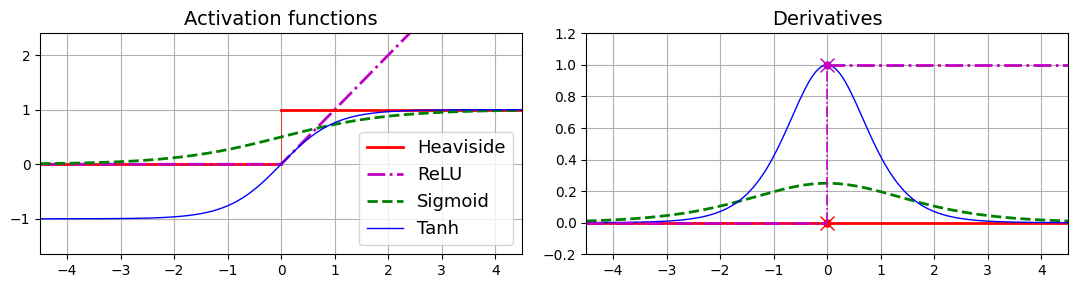

In [3]:
# extra code – this cell generates and saves Figure 10–8

from scipy.special import expit as sigmoid

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

#NOTE:
**MLP does not use any activation function for the output layer, so it’s free to output any value it wants. This is generally fine, but if you want to guarantee that the output will always be positive, then you should use the ReLU activation function in the output layer, or the softplus activation function, which is a smooth variant of ReLU: softplus(z) = log(1 + exp(z)).**

Table 10-1. Typical regression MLP architecture
Hyperparameter	Typical value
# hidden layers

Depends on the problem, but typically 1 to 5

# neurons per hidden layer

Depends on the problem, but typically 10 to 100

# output neurons

1 per prediction dimension

# Hidden activation

ReLU

# Output activation

None, or ReLU/softplus (if positive outputs) or sigmoid/tanh (if bounded outputs)

# Loss function

MSE, or Huber if outliers

MLPs can also easily handle multilabel binary classification tasks . For example, you could have an email classification system that predicts whether each incoming email is ham or spam, and simultaneously predicts whether it is an urgent or nonurgent email.

**If each instance can belong only to a single class, out of three or more possible classes (e.g., classes 0 through 9 for digit image classification), then you need to have one output neuron per class, and you should use the softmax activation function for the whole output layer . The softmax function  will ensure that all the estimated probabilities are between 0 and 1 and that they add up to 1, since the classes are exclusive. As you saw in Chapter 3, this is called multiclass classification.**

# CROSS ENTROPY:
**Regarding the loss function, since we are predicting probability distributions, the cross-entropy loss is generally a good choice.**

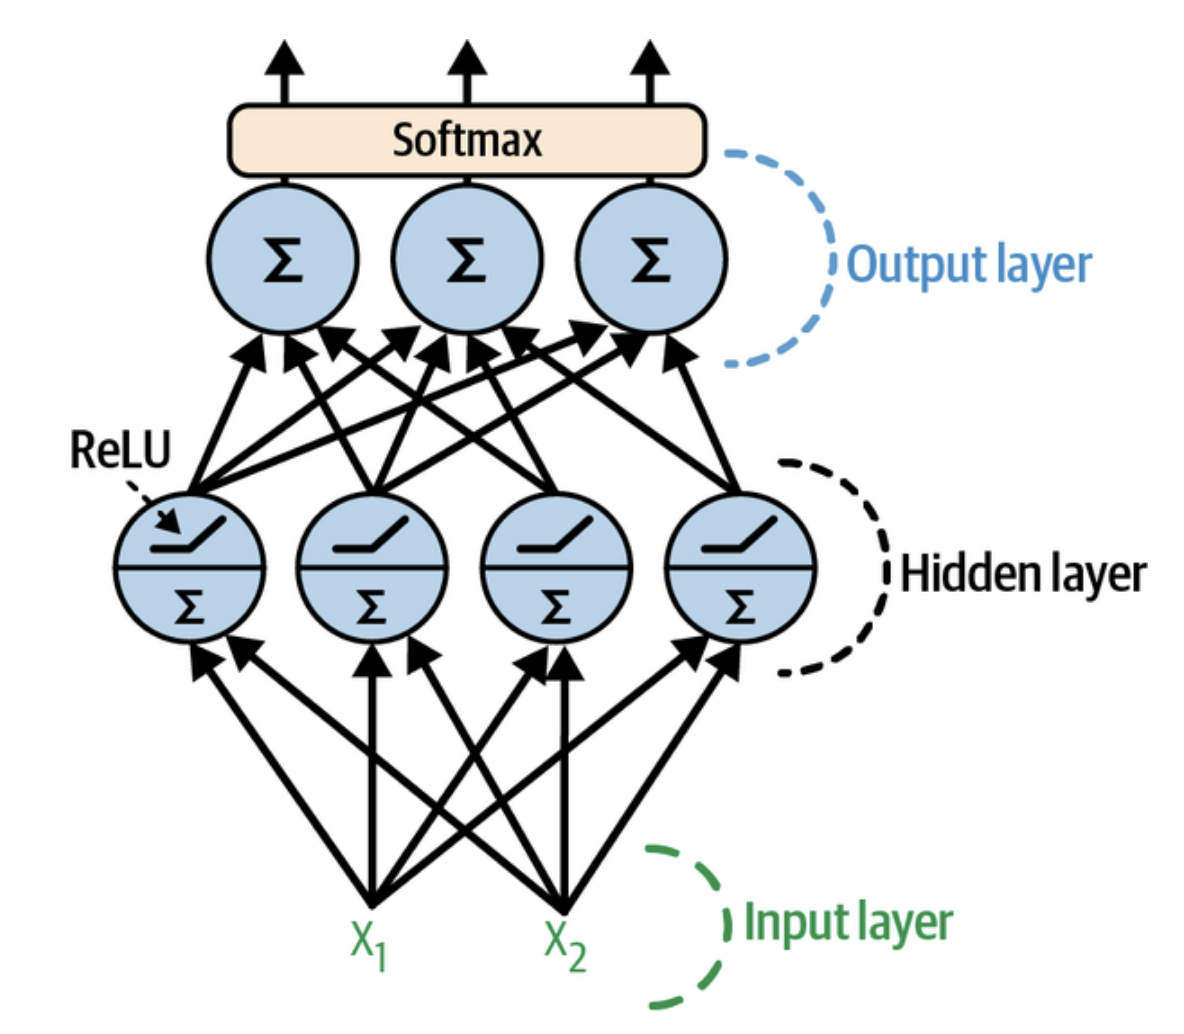

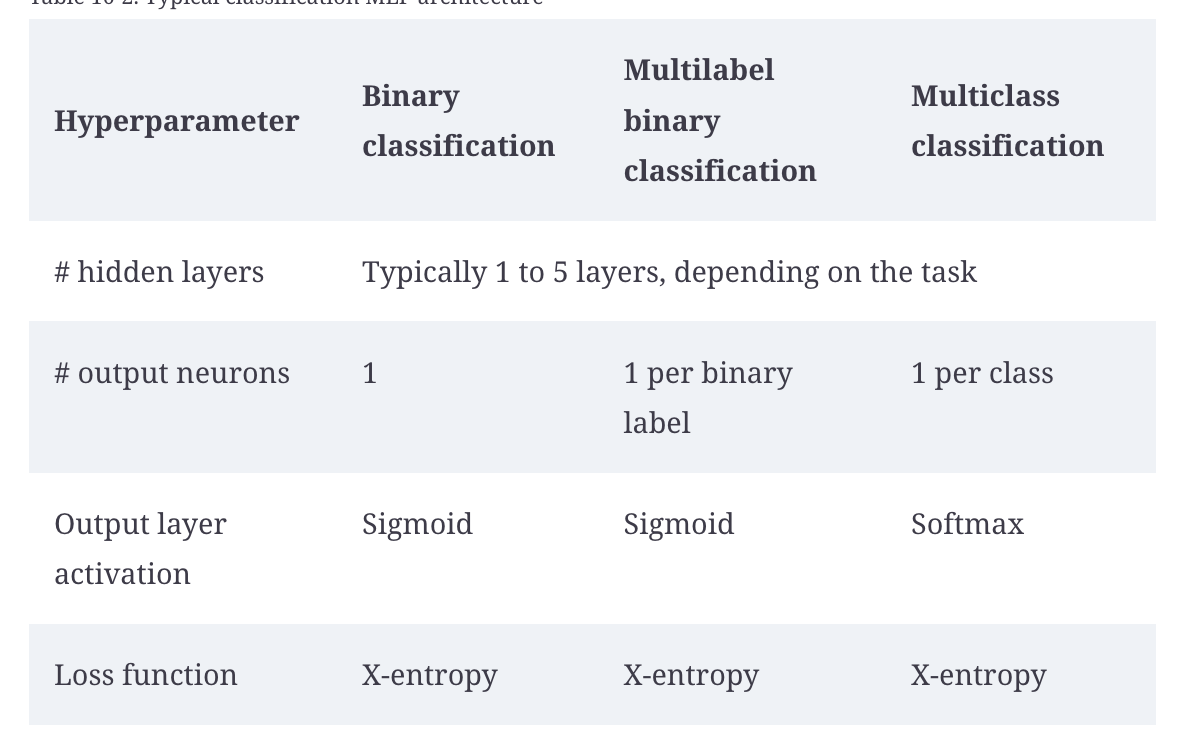